# Calibration

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Cell dimensions
XCELL = 42.
ZCELL = 13.

# X coordinates translation
global_x_shifts = [994.2, 947.4,-267.4,-261.5,]

# Z coordinates translations
local_z_shifts = [z*ZCELL for z  in range(0,4)]
global_z_shifts = [823.5, 0, 823.5, 0]

In [61]:
cal1_path="/home/ema/Uni/LCP/LCPa_Project/180904/Run000260/data_000000.txt"
cal1={}
false_events_counter=0
with open(cal1_path) as cal1_file:
    for line in cal1_file:
        row=line.strip().split()
        key=int(row[0])
        n_hits=int(row[1])
        if n_hits!=0:
            data_array=np.array(row[2:]).reshape((n_hits, 5))
            data_dict={}
            columns=['chamber', 'layer', 'xleft', 'xright', 'time']
            for i in range(2):
                data_dict[columns[i]]=data_array[:, i].astype(int)
            for i in range(2,5):
                data_dict[columns[i]]=data_array[:, i].astype(float)
            value=pd.DataFrame(data_dict)
            cal1[key]=value
        else:
            false_events_counter+=1
original_data_length=len(cal1)+false_events_counter
print(f"null over nonnull events ratio (%) : {false_events_counter/(len(cal1)+false_events_counter)*100}%")

null over nonnull events ratio (%) : 40.931312637496944%


In [5]:
print(cal1[1].dtypes)

chamber      int64
layer        int64
xleft      float64
xright     float64
time       float64
dtype: object


In [128]:
for event in cal1.values():
    event['xrg']=event.apply(lambda df: global_x_shifts[int(df['chamber'])]-df['xleft'], axis=1)
    event['xlg']=event.apply(lambda df: global_x_shifts[int(df['chamber'])]-df['xright'], axis=1)
    event['zg']=event.apply(lambda df: global_z_shifts[int(df['chamber'])]-local_z_shifts[int(df['layer'])-1]+4*ZCELL-ZCELL/2, axis=1)

In [129]:
print(cal1[25])

   chamber  layer  xleft  xright   time    xlg    xrg     zg
0        2      1  146.0   148.0   18.0 -415.4 -413.4  869.0
1        2      3  145.3   148.7   32.0 -416.1 -412.7  843.0
2        2      2  111.0   141.0  278.0 -408.4 -378.4  856.0
3        2      4  148.5   187.5  363.0 -454.9 -415.9  830.0
4        3      2  159.2   176.8  164.0 -438.3 -420.7   32.5
5        3      4  157.7   178.3  191.0 -439.8 -419.2    6.5
6        3      1  177.2   200.8  220.0 -462.3 -438.7   45.5
7        3      3  177.7   200.3  210.0 -461.8 -439.2   19.5


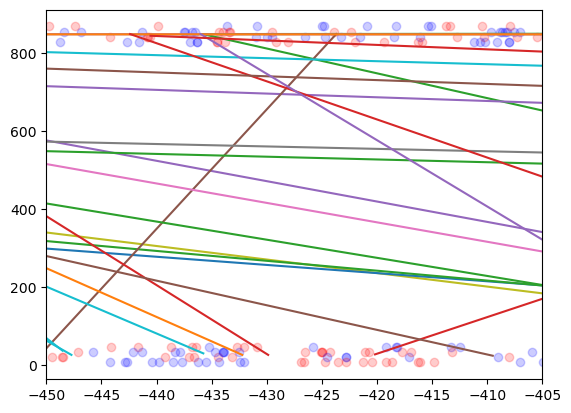

   chamber  layer  xleft  xright   time    xlg    xrg     zg
0        2      1  146.0   148.0   18.0 -415.4 -413.4  869.0
1        2      3  145.3   148.7   32.0 -416.1 -412.7  843.0
2        2      2  111.0   141.0  278.0 -408.4 -378.4  856.0
3        2      4  148.5   187.5  363.0 -454.9 -415.9  830.0
4        3      2  159.2   176.8  164.0 -438.3 -420.7   32.5
5        3      4  157.7   178.3  191.0 -439.8 -419.2    6.5
6        3      1  177.2   200.8  220.0 -462.3 -438.7   45.5
7        3      3  177.7   200.3  210.0 -461.8 -439.2   19.5


In [130]:
fig, ax=plt.subplots()
count=0
for event in cal1.values():
    ax.scatter(event['xlg'], event['zg'], color='blue', alpha=0.2)
    ax.scatter(event['xrg'], event['zg'], color='red', alpha=0.2)
    ax.plot((event.groupby('chamber').mean().reset_index()['xlg']+event.groupby('chamber').mean().reset_index()['xlg'])/2, event.groupby('chamber').mean().reset_index()['zg'], '-')
    count+=1
    if(count>=100):
        break
ax.set_xlim(-450, -405)
plt.show()
print(cal1[25])

[(2515, '[2, 3]'), (429, '[0]'), (402, '[3]'), (353, '[0, 1]'), (255, '[1]'), (250, '[0, 2, 3]'), (128, '[2]'), (110, '[0, 1, 2, 3]'), (105, '[0, 3]'), (90, '[1, 2, 3]'), (71, '[0, 1, 3]'), (55, '[1, 3]'), (28, '[0, 2]'), (24, '[1, 2]'), (18, '[0, 1, 2]')]
('[2, 3]', '[0]', '[3]', '[0, 1]', '[1]', '[0, 2, 3]', '[2]', '[0, 1, 2, 3]', '[0, 3]', '[1, 2, 3]', '[0, 1, 3]', '[1, 3]', '[0, 2]', '[1, 2]', '[0, 1, 2]') (2515, 429, 402, 353, 255, 250, 128, 110, 105, 90, 71, 55, 28, 24, 18)
   chamber  layer  xleft  xright   time    xlg    xrg     zg
0        2      1  146.0   148.0   18.0 -415.4 -413.4  869.0
1        2      3  145.3   148.7   32.0 -416.1 -412.7  843.0
2        2      2  111.0   141.0  278.0 -408.4 -378.4  856.0
3        2      4  148.5   187.5  363.0 -454.9 -415.9  830.0
4        3      2  159.2   176.8  164.0 -438.3 -420.7   32.5
5        3      4  157.7   178.3  191.0 -439.8 -419.2    6.5
6        3      1  177.2   200.8  220.0 -462.3 -438.7   45.5
7        3      3  177.7   

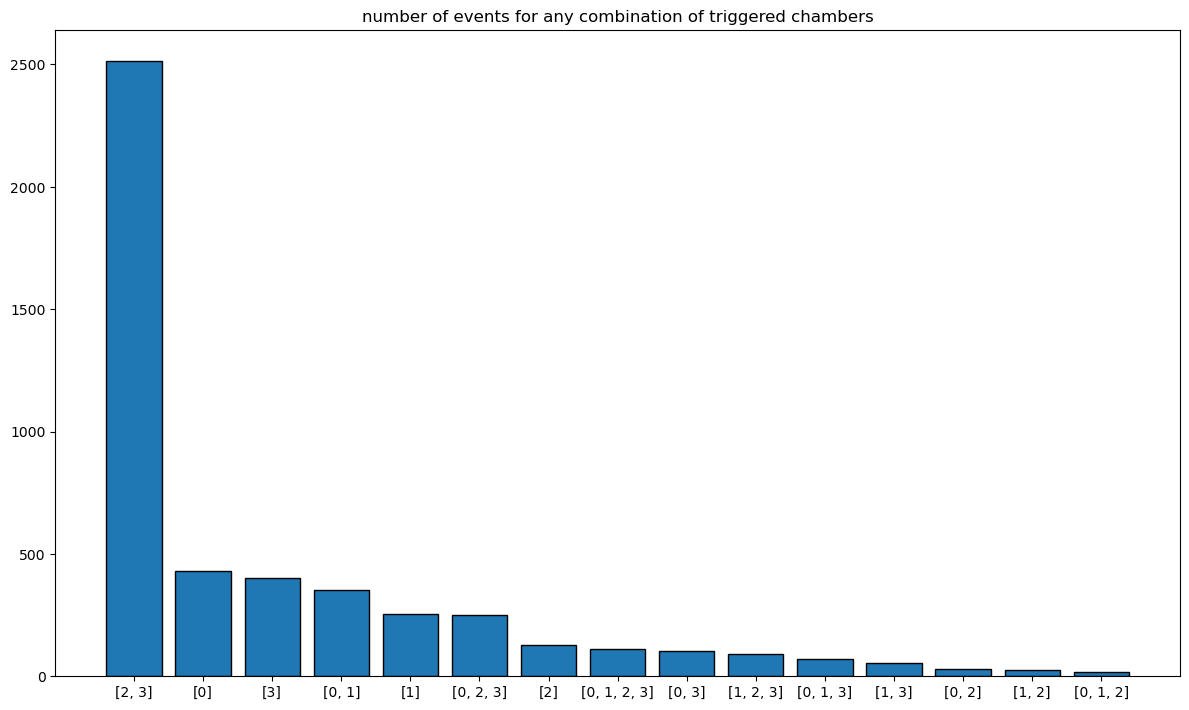

In [131]:
fig,ax=plt.subplots(figsize=(12,7))
bins, counts=(np.unique([str(sorted(np.unique(event['chamber']))) for event in cal1.values()], return_counts=True))
zipped=zip(counts, bins)
sortedzipped=sorted(zipped, reverse=True)
print(sortedzipped)
[counts, bins]=zip(*sortedzipped)
print(bins, counts)
ax.bar(bins, counts, edgecolor='black')
fig.tight_layout()
ax.set_title('number of events for any combination of triggered chambers')
print(cal1[25])

10.2441351888668
8

   chamber  layer  xleft  xright   time    xlg    xrg     zg
0        2      1  146.0   148.0   18.0 -415.4 -413.4  869.0
1        2      3  145.3   148.7   32.0 -416.1 -412.7  843.0
2        2      2  111.0   141.0  278.0 -408.4 -378.4  856.0
3        2      4  148.5   187.5  363.0 -454.9 -415.9  830.0
4        3      2  159.2   176.8  164.0 -438.3 -420.7   32.5
5        3      4  157.7   178.3  191.0 -439.8 -419.2    6.5
6        3      1  177.2   200.8  220.0 -462.3 -438.7   45.5
7        3      3  177.7   200.3  210.0 -461.8 -439.2   19.5


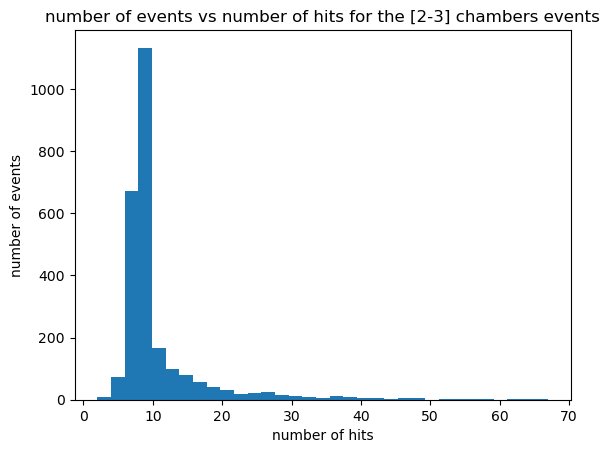

In [132]:
n_hits_per_event=[len(event) for event in cal1.values() if sorted(np.unique(event['chamber']))==[2,3]]
print(np.mean(n_hits_per_event))
print(np.unique(n_hits_per_event)[np.argmax(np.unique(n_hits_per_event, return_counts=True)[1])])
plt.hist(n_hits_per_event, bins=33)
print()
plt.xlabel('number of hits')
plt.ylabel('number of events')
plt.title('number of events vs number of hits for the [2-3] chambers events')
print(cal1[25])

In [133]:
impeccable_events=list(filter(lambda key : sorted(np.unique(cal1[key]['chamber']))==[2,3] and len(cal1[key])==8, cal1))
print(impeccable_events)
print(f"ratio between events in [2-3] config and nonzerohit events {len(impeccable_events)/len(cal1)}\n", f"ratio between events in [2-3] config and original dataset events {len(impeccable_events)/original_data_length}")
print(cal1[25])

[25, 35, 42, 44, 47, 51, 52, 59, 69, 80, 82, 88, 98, 128, 130, 137, 185, 186, 225, 250, 258, 260, 293, 301, 309, 329, 331, 348, 353, 354, 355, 357, 361, 366, 369, 371, 372, 374, 375, 377, 379, 396, 397, 405, 418, 428, 430, 431, 440, 497, 499, 501, 555, 560, 580, 581, 583, 599, 616, 622, 631, 642, 648, 650, 661, 672, 692, 702, 706, 707, 717, 727, 737, 756, 764, 768, 774, 784, 791, 792, 809, 812, 831, 834, 841, 843, 847, 848, 853, 864, 887, 890, 924, 933, 937, 950, 955, 969, 976, 990, 996, 1004, 1006, 1021, 1022, 1038, 1049, 1062, 1066, 1068, 1076, 1087, 1090, 1091, 1097, 1115, 1117, 1121, 1142, 1153, 1177, 1180, 1187, 1188, 1213, 1229, 1241, 1244, 1248, 1261, 1308, 1314, 1318, 1323, 1326, 1332, 1333, 1342, 1355, 1396, 1406, 1414, 1416, 1423, 1434, 1435, 1437, 1438, 1441, 1449, 1470, 1482, 1496, 1515, 1528, 1540, 1548, 1554, 1556, 1561, 1569, 1577, 1579, 1584, 1585, 1592, 1606, 1609, 1612, 1614, 1617, 1626, 1628, 1633, 1637, 1644, 1650, 1654, 1669, 1670, 1676, 1683, 1685, 1688, 1689, 170

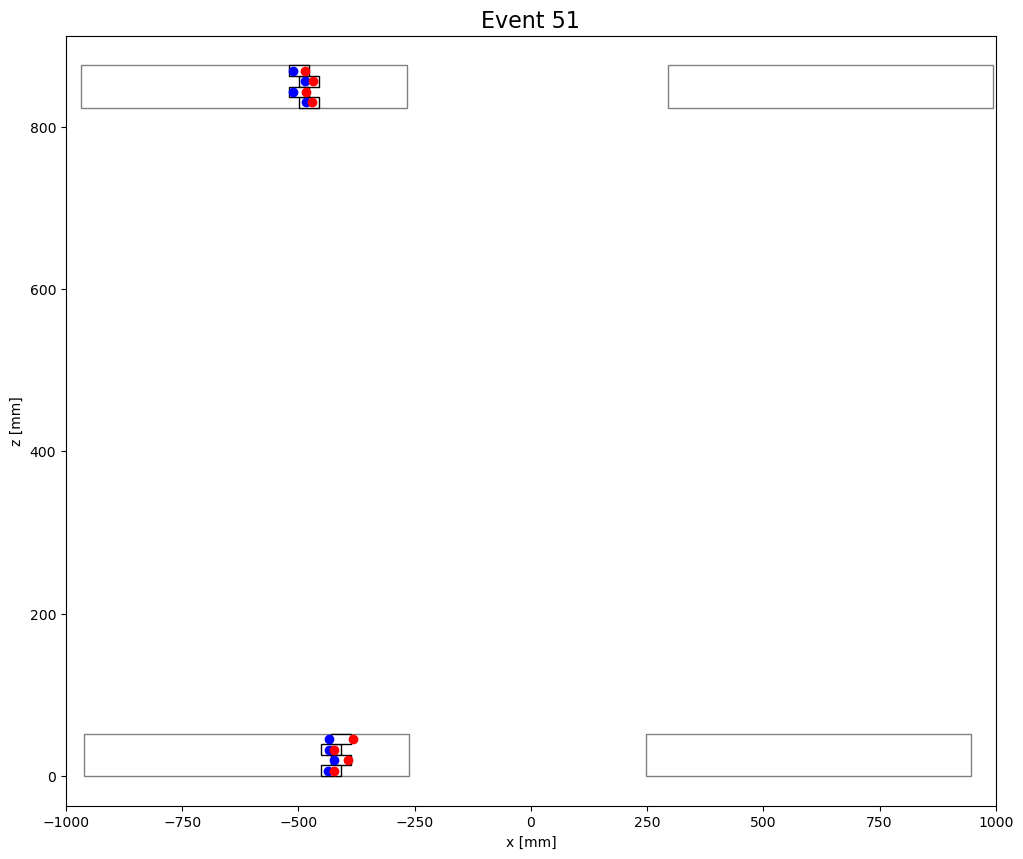

In [156]:
from matplotlib.patches import Rectangle

def event_plotter(event_number):
    my_event=cal1[event_number]
    x_centers, z_centers=(my_event['xlg']+my_event['xrg'])/2, my_event['zg']
    fig, ax=plt.subplots(figsize=(12,10))

    #drawing the detectors   
    for i in range(4):
        x_origs=np.array(global_x_shifts)-700
        z_origs=global_z_shifts
        detector=Rectangle([x_origs[i], z_origs[i]], 700, 4*ZCELL, edgecolor='gray', facecolor='white')
        ax.add_artist(detector)

    #drawing the triggered cells
    for i in range(len(my_event)):
        rect=Rectangle([x_centers[i]-XCELL/2, z_centers[i]-ZCELL/2], XCELL, ZCELL, edgecolor='black', facecolor='white')
        ax.add_artist(rect)

    ax.scatter(my_event['xlg'], my_event['zg'], color='blue')
    ax.scatter(my_event['xrg'], my_event['zg'], color='red')
    ax.set_xlim([-1000, 1000])
    ax.set_xlabel('x [mm]')
    ax.set_ylabel('z [mm]')
    ax.set_title(f'Event {event_number}', size=16)
    plt.show()
    my_event

event_plotter(51)

### Let's observe that the eighth hit of 51-th event (so maybe other ones too) not only presents xleft and xright farther apart than the width of a cell, but neither of the two isn't compatible with a fitting line for the trajectory